# Problem Set 6 - Feature Selection

_Data Preparation Course at UCU, 2019_

## NB

### __1) Which programming languages to use?__

We recommend to use Python for this task, but if you find working library alternatives for the algorithms we
use in this assignment in R, you are free to work with that as well.

### __2) What libraries/packages to use?__

You are free to choose any appropriate libraries (good choice would be __pandas__, __numpy__,
__scicit-learn__).

### __3) How to summarize my homework?__

The best way is to create an Jupyter/R notebook with code and explanations for each strategy. In case you
are not familiar with these tools, you can create a Python/R scripts and write explanations as comments.
However, we strongly recommend you to use Jupyter/R notebooks, as those are #1 tools in applied data
analysis nowadays.

__Please do not include large datasets in the archive with your notebook(s)!__

### __4) Useful links__

1. [Q/A on Dimentionality Reduction Techniques](https://www.analyticsvidhya.com/blog/2017/03/questions-dimensionality-reduction-data-scientist/)
2. [The Ultimate Guide to 12 Dimensionality Reduction Techniques](https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/)
3. [Reducing Dimentionality](https://towardsdatascience.com/reducing-dimensionality-from-dimensionality-reduction-techniques-f658aec24dfe)
4. [PCA in Details](https://towardsdatascience.com/dimensionality-reduction-does-pca-really-improve-classification-outcome-6e9ba21f0a32)
5. [Why, How and When to apply Feature Selection](https://towardsdatascience.com/why-how-and-when-to-apply-feature-selection-e9c69adfabf2)

## Tasks

### __1) [5pt] Feature selection__

__1.1.__ Download the Spambase Data Set from UCI ML repository __[(Dataset)](http://archive.ics.uci.edu/ml/datasets/Spambase)__.

In [1]:
## YOU CAN PLACE YOUR SOLUTION IN THE CELLS LIKE THIS ##
#######################################################
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import numpy as np
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot
#######################################################

__1.2.__ Train a regular Logistic Regression model using original attributes. Save its accuracy on `train` and `test`
sets.

In [2]:
data = pd.read_csv('spambase.data', header=None, usecols=[i for i in range(58)] )
X_train, X_test, y_train, y_test = train_test_split(data.drop(57,axis=1), data[57], test_size=0.33, random_state=42)

model = LogisticRegression(solver='lbfgs')
def model_fit(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_predict_test = model.predict(X_test) 
    
    y_predict_train = model.predict(X_train) 
    
    
    print("#####################################################################################")
    print("Accuracy score on test : ",accuracy_score(y_test.values, y_predict_test))
    print("f1_score on test : ",f1_score(y_test, y_predict_test))
    print("Accuracy score on train : ",accuracy_score(y_train.values, y_predict_train))
    print("f1_score on train : ",f1_score(y_train, y_predict_train))
    print("#####################################################################################")
    return model, accuracy_score(y_test, y_predict_test) 
model_fit(model, X_train, X_test, y_train, y_test)

#####################################################################################
Accuracy score on test :  0.9216589861751152
f1_score on test :  0.9053301511535402
Accuracy score on train :  0.9198572355613238
f1_score on train :  0.8939458995276943
#####################################################################################


C:\Users\Fedoriv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False), 0.9216589861751152)

__1.3.__ Apply Forward Stepwise Selection technique to find the subset of attributes which minimizes an estimate of the expected predition error. Visualize the process of this selection (subset size on $x$-axis).

In [3]:
model_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

def get_sfs_list(model, X_train, y_train, forward=True):
    sfs1 = sfs(model,
           k_features=5,
           forward=forward,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)
    sfs1 = sfs1.fit(X_train, y_train)
    return list(sfs1.k_feature_idx_)
#get_sfs_list(model_clf, X_train, y_train) # [6,15,51,52,56]


__1.3.1.__ Train a Logistion Regression model using the features found with FSS. Save its accuracy on `train` and `test` datasets.

In [4]:
X_train_ = X_train.iloc[:,[6,15,51,52,56]]
X_test_ = X_test.iloc[:,[6,15,51,52,56]]


model_fit(model, X_train_, X_test_, y_train, y_test)

#####################################################################################
Accuracy score on test :  0.8426596445029625
f1_score on test :  0.7856502242152466
Accuracy score on train :  0.8465282284231019
f1_score on train :  0.7718282682103232
#####################################################################################


C:\Users\Fedoriv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False), 0.8426596445029625)

__1.4.__ Apply Backward Stepwise Selection technique to find the subset of attributes which minimizes an estimate of the expected predition error. Visualize the process of this selection (subset size on $x$-axis).

In [5]:
# get_sfs_list(model, X_train, y_train, False) [6,15,51,52,56]

__1.4.1.__ Train a Logistion Regression model using the features found with BSS. Save its accuracy on `train` and `test` datasets.

In [6]:
X_train_ = X_train.iloc[:,[6,15,51,52,56]]
X_test_ = X_test.iloc[:,[6,15,51,52,56]]
model_fit(model, X_train_, X_test_, y_train, y_test)

#####################################################################################
Accuracy score on test :  0.8426596445029625
f1_score on test :  0.7856502242152466
Accuracy score on train :  0.8465282284231019
f1_score on train :  0.7718282682103232
#####################################################################################


C:\Users\Fedoriv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False), 0.8426596445029625)

__1.5.__ Compare two approaches (FSS and BSS). Did they found the same subset? If not, explain why it could have happend?

__1.6.__ Use Decision Trees to find important features. Visualize relative feature importance.

[0.00000000e+00 5.40649518e-04 4.99617588e-03 0.00000000e+00
 2.84379385e-02 4.31605382e-03 9.97658372e-02 6.61757914e-03
 2.79248459e-04 0.00000000e+00 4.18057153e-03 3.63323418e-03
 0.00000000e+00 7.16120424e-03 4.32696193e-03 3.50644104e-02
 1.55217545e-02 3.26744001e-03 4.62176464e-03 6.10240549e-03
 4.39545996e-02 7.22848205e-03 1.31867249e-02 2.39387117e-02
 3.93231809e-02 8.04676861e-03 2.95155924e-02 2.06668638e-02
 5.32067008e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.04390400e-03
 1.66909043e-02 0.00000000e+00 5.41894464e-03 0.00000000e+00
 4.04551113e-03 1.28080165e-02 3.63075081e-03 7.19894888e-03
 8.48191325e-03 2.25484557e-02 0.00000000e+00 6.34154864e-03
 4.71616583e-03 3.26999486e-03 0.00000000e+00 1.07767612e-01
 2.92129815e-01 6.03038003e-04 4.91107777e-02 1.99757125e-02
 9.20316018e-03]


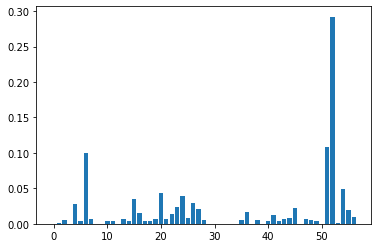

In [7]:
model = XGBClassifier()
model.fit(X_train, y_train)
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

__1.6.1.__ Train a Logistic Regression model using the features found with DT. Save its accuracy on `train` and `test` datasets.

In [10]:
def get_features(model):
    x = model.feature_importances_.tolist()
    lst = []
    for i in range(5):
        lst.append(max(x))
        x.remove(max(x))
    indexes =[]
    for item in lst:
        indexes.append(model.feature_importances_.tolist().index(item))
    return indexes
lst = get_features(model)


X_train_ = X_train.iloc[:,lst]
X_test_ = X_test.iloc[:,lst]


model_fit(model, X_train_, X_test_, y_train, y_test)

#####################################################################################
Accuracy score on test :  0.9005924950625411
f1_score on test :  0.8740617180984154
Accuracy score on train :  0.9231018818948734
f1_score on train :  0.8958241758241758
#####################################################################################


(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=3,
               min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
               nthread=None, objective='binary:logistic', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=1, verbosity=1), 0.9005924950625411)

__1.7.__ Apply the following “manual” techniques to detect redundant features: missing value ratio, low variance and high correlation filters.

In [11]:
x = model.feature_importances_.tolist()
indexesOfFeatures = []
for i in x:
    if(i != 0):
        indexesOfFeatures.append(x.index(i))
print('number of features after removing redundant features: ',len(indexesOfFeatures))
print('number of features after removing redundant features: ',len(model.feature_importances_.tolist()))

number of features after removing redundant features:  5
number of features after removing redundant features:  5


__1.7.1.__ Remove features you found (in 2.7.) from the dataset and train a Logistic Regression model using the rest of the data. Save its accuracy on `train` and `test` datasets.

__1.8.__ Compare the results of different methods of feature selection. Write pros/cons of each of them.

\#\# You can place your answer here \#\#